# Buisness Objective:
- An US Electrical company wants to analyse their sales and productivity by prediciting a particular report to be Suspicious
- The reports collected by the firm where each SalesPerson reports at a certain periodicity on which product was sold,how much quantity and totalAmount . The past data also contains Suspicious column to determine the target .
- For statergic planning they also want to segment salesPerson to 3 levels

# Machine Learning Objective:
- The business objective expects us to create a fraud detecting system for each of their report based on their past data.
- It is a Supervised learning - classifcation problem with Suspicious Column as our dependent variable.
- Segmentation of SalesPerson is Unsupervised Learning - clustering problem with respect to SalesPerson

#### The ML model could help the company to understand the amount of fraud reports being given by the salesperson and also remove those reports and do a complete study on non supsicious reports for Sales and productivity analysis 
#### The segmentation of salespersons would make them know that a few of the salesperson are completely different from the rest and they could look into their sales more or even remove them from the job if they are high risk salesperson 

## Loading required libraries

In [1]:
import os
import numpy as np
import os
import pandas as pd
import statistics
from statistics import *
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz,DecisionTreeRegressor
from sklearn.metrics import accuracy_score,classification_report, recall_score, precision_score,confusion_matrix,mean_absolute_error,mean_squared_error, f1_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc

from sklearn import tree
from sklearn.model_selection import GridSearchCV
import graphviz
import matplotlib.pyplot as plt

#from imblearn.over_sampling import SMOTE


path = os.getcwd()


In [2]:
## visualizations
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly
import plotly.offline as pyoff ## if not we have to login to their websit and do
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
#import squarify # for tree maps
%matplotlib inline
from plotly.offline import plot
init_notebook_mode(connected=True)

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Reading and Understanding the data

In [4]:
data = pd.read_excel("Train.xlsx")

- Understanding the Data

In [5]:
data.shape

(42582, 6)

In [6]:
data.head(5)

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious
0,Rep10101,C21116,PR6112,182,1665,indeterminate
1,Rep10102,C21116,PR6112,182,1740,indeterminate
2,Rep10103,C21116,PR6253,101,1040,indeterminate
3,Rep10104,C21116,PR6253,283,4495,No
4,Rep10105,C21116,PR6294,108,1465,indeterminate


In [7]:
data.columns

Index(['ReportID', 'SalesPersonID', 'ProductID', 'Quantity', 'TotalSalesValue',
       'Suspicious'],
      dtype='object')

In [8]:
data.dtypes

ReportID           object
SalesPersonID      object
ProductID          object
Quantity            int64
TotalSalesValue     int64
Suspicious         object
dtype: object

# Expoloratory Analysis

In [9]:
data.describe(include="all")

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious
count,42582,42582,42582,4.258200e+04,4.258200e+04,42582
unique,42582,992,593,NaN,NaN,3
top,Rep29590,C21976,PR6253,NaN,NaN,indeterminate
freq,1,1359,2590,NaN,NaN,39846
mean,NaN,NaN,NaN,4.910048e+03,1.620923e+04,NaN
std,NaN,NaN,NaN,9.833621e+04,5.997195e+04,NaN
min,NaN,NaN,NaN,3.300000e+01,5.980000e+02,NaN
25%,NaN,NaN,NaN,1.110000e+02,1.345000e+03,NaN
50%,NaN,NaN,NaN,2.060000e+02,2.980000e+03,NaN
75%,NaN,NaN,NaN,1.136000e+03,1.076500e+04,NaN


* By observing the summary we can see that Quantity's mean is being driven by its huge outliers 
- there is a huge differnece between the 75% and the max 

* The totalSalesValue is slightly being influenced by some outliers as well but not as much as Quantity 
* The Suspicious column have 3 levels with the most being indeterminate

#### Checking the median of Quantity and TotalSalesValue to see the difference it makes without outliers 

In [10]:
median(data.Quantity)

206.0

In [11]:
median(data.TotalSalesValue)

2980.0

#### Checking if there are any NA values in the dataset

In [12]:

data.isnull().sum()

ReportID           0
SalesPersonID      0
ProductID          0
Quantity           0
TotalSalesValue    0
Suspicious         0
dtype: int64

## Correlation Plot between numerical attributes

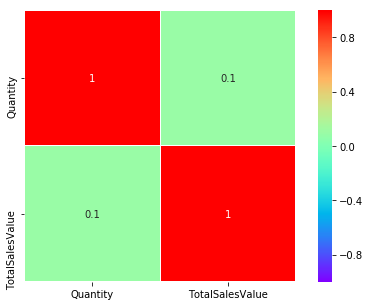

In [13]:
import seaborn as sns
from pandas import ExcelWriter
from pandas import ExcelFile

corr = data.corr() 

#writer=ExcelWriter('CorrelationMith.xlsx')
#corr.to_excel(writer,'Sheet1',index=False)
#writer.save()

plt.figure(figsize=(8, 5))
sns.heatmap(corr,cmap='rainbow', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 10}, square=True)


- there is no correlation within attributes in the dataset

### Distribution of Target Column

In [14]:
d_temp=data.Suspicious.value_counts()
trace = go.Pie(values=d_temp,labels=d_temp.index)

layout = go.Layout(title = 'Percentage of Suspicicous levels')
data1 = [trace]
fig = go.Figure(data= data1,layout=layout)
iplot(fig)

## The count of Suspicious reports with respect to a SalesPerson

In [15]:
d_S=data[data.Suspicious=="Yes"].groupby("SalesPersonID")["Suspicious"].count()

In [16]:
data_plot = [go.Bar(x=d_S.index,
                          y=d_S.values.astype(float),
       marker=dict(
        color="#CC0E1D",# Lava (#CC0E1D)
#         color = 'rgb(200,0,0)'   `
    ))]
layout = go.Layout(title = "Suspicious/YES vs SalesPerson",xaxis=dict(title="SalesPersonID"),yaxis=dict(title="Count of Suspicious YES"))

fig = go.Figure(data= data_plot, layout=layout)
iplot(fig)

#### C22030 is the salesperson giving most Suscipious Transcations with a count of 9 Suspicious records

## The count of Suspicious reports with respect to a ProductID

In [17]:
# grouping the records of suspicious reports with respect to productID and counting the nunber of records per Product
d_8=data[data.Suspicious=="Yes"].groupby("ProductID")["Suspicious"].count()
print("The number of products which have Suspicious reports is - ",d_8.shape[0])

The number of products which have Suspicious reports is -  115


In [18]:
# sorting and selecting only top 15 products with highest Suspicious reports 
d_8.sort_values(ascending=False, axis =0, inplace = True)
d_8f=d_8.head(15)

In [19]:
data_plot = [go.Bar(x=d_8f.index,
                          y=d_8f.values.astype(float),
       marker=dict(
        color="#CC0E1D",# Lava (#CC0E1D)
#         color = 'rgb(200,0,0)'   `
    ))]
layout = go.Layout(title = "ProductID vs Suspicious YES ",xaxis=dict(title="Product ID"),yaxis=dict(title="Count of Suspicious YES"))
fig = go.Figure(data= data_plot, layout=layout)
iplot(fig)

- Showing only top 15 products arranged in descending order of their count of suspicious reports 

#### PR6115 product is the one with most Suspicous Transcations 

## SalesPerson with the maximum SalesValue also segregated with Suspicious column

In [20]:
d_7=data.groupby(["SalesPersonID","Suspicious"]).agg({"TotalSalesValue":np.sum},axis=0)

In [21]:
d_7.head()

TotalSalesValue
SalesPersonID Suspicious                    
C21116        No                        4495
              indeterminate            19585
C21118        No                     1222090
              Yes                      23790
              indeterminate           746080

In [22]:
## the maximum sales value 
print(d_7.max())

TotalSalesValue    26522900
dtype: int64


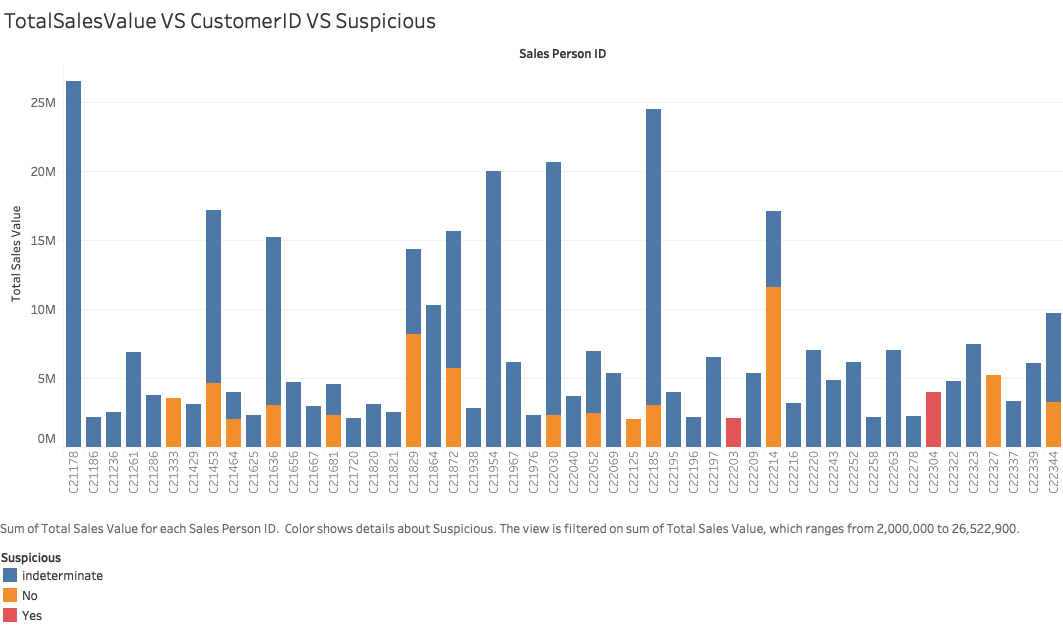

In [23]:
from IPython.display import Image
Image("TotalSalesValue VS CustomerID VS Suspicious1.png") 
## table done on tableau Considering TotalSales > 2M 

In [24]:
d_7.loc[("C21178",),"TotalSalesValue"] ## Sales Person C21178 is highest sales

Suspicious
indeterminate    26522900
Name: TotalSalesValue, dtype: int64

#### Sales Person C21178 has the highest TotalSalesValue across all SalesPersons
- with all his sales reports being indeterminate on suspicious(target)

## Product which has sold the most Quantity 

In [25]:
## group by productID and sum the Quantity sold across reports based on that productID
d_5=data.groupby("ProductID").agg({'Quantity':np.sum},axis=0)

In [26]:
data_plot = [go.Bar(x=d_5.index,
                          y=d_5.Quantity.astype(float),
       marker=dict(
        color="#CC0E1D",# Lava (#CC0E1D)
#         color = 'rgb(200,0,0)'   `
    ))]
layout = go.Layout(title = "Product vs Quantity",xaxis=dict(title="ProductID"),yaxis=dict(title="Total Quantity Sold"))
fig = go.Figure(data= data_plot, layout=layout)
iplot(fig)

- ProductID PR6550 is shown as the highest Quantity Sold 

- Lets look at that particular productID in detail 

In [27]:
data[(data.ProductID=="PR6550")&(data.ReportID=="Rep34193")] 
## This Report ID was found on seeing all PR6550 records , this Record was found to be Errornous or Big Outlier
## Therefore, why PR6550 was compartively very high on quantity 

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious
24092,Rep34193,C21992,PR6550,19708130,136860,Yes


#### REMOVING THAT ONE TUPLE AND PLOTTING AGAIN 

In [28]:
d_Rem=data[~((data.ProductID=="PR6550")&(data.ReportID=="Rep34193"))]
d_5Rem=d_Rem.groupby("ProductID").agg({'Quantity':np.sum},axis=0)

In [29]:
d_51=d_5Rem.sort_values(ascending=False,by="Quantity", axis =0)

In [30]:
d_51=d_51.head(20) ## showing only top 20 ProductID s with most Quantity Sold 

In [31]:
data_plot = [go.Bar(x=d_51.index,
                          y=d_51.Quantity.astype(float),
       marker=dict(
        color="rgb(300,150,20)",# Lava (#CC0E1D)
#         color = 'rgb(200,0,0)'   `
    ))]
layout = go.Layout(title = "Product vs Quantity",xaxis=dict(title="ProductID"),yaxis=dict(title="Total Quantity Sold"))
fig = go.Figure(data= data_plot, layout=layout)
iplot(fig)

In [32]:
## therefore the second highest is checked for Suspicious Transcations which are of high quantity 
data[(data.ProductID=="PR6444")&(data.Suspicious=="Yes")]
## we find that the quantity is less compared to TOTAL quantity 

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious
39296,Rep49397,C21636,PR6444,662,382890,Yes
39521,Rep49622,C21636,PR6444,470,270320,Yes


#### Therefore, product PR6444 genineuly sold most quantity 

## Average Selling Price of a Product across all Reports 

In [33]:
d1=data.groupby("ProductID")

In [34]:
d1=d1.agg({'Quantity': np.sum,'TotalSalesValue':np.sum},axis=0)
d1['ASP']=d1.TotalSalesValue/d1.Quantity ## selling price is Sales/Quantity 

In [35]:
data_plot = [go.Bar(x=d1.index,
                          y=d1.ASP.astype(float),
       marker=dict(
        color="#CC0E1D",# Lava (#CC0E1D)
#         color = 'rgb(200,0,0)'   `
    ))]
layout = go.Layout(title = "Product vs ASP")
fig = go.Figure(data= data_plot, layout=layout)
iplot(fig)

- Product PR6290 is found to have compartively very high Average Selling Price Across Products
- On Observing the records which have PR6290 as product in the records 
- This record was found which was outlier and also Suspicious

In [36]:
data[(data.ProductID=='PR6290')&(data.ReportID=="Rep38829")] 
## this was after going through the full productID PR6290 which was HIHGEST 
## that one fraudlent row was causing PR 6290 to be highest ASP ( Average Selling Price)

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious
28728,Rep38829,C22304,PR6290,350,3953985,Yes


### REMOVING THAT ONE TUPLE AND PLOTTING AGAIN

In [37]:
d_rev_ASP=data[~((data.ProductID=='PR6290')&(data.ReportID=="Rep38829"))]

In [38]:
d_rev1=d_rev_ASP.groupby("ProductID").agg({'Quantity': np.sum,'TotalSalesValue':np.sum},axis=0)
d_rev1['ASP']=d_rev1.TotalSalesValue/d_rev1.Quantity

In [39]:
d_rev1.sort_values(ascending=False,by="ASP", axis =0, inplace = True)
d_rev1=d_rev1.head(20) ## taking onlu top 20 products with high Average Selling Price

In [40]:
data_plot = [go.Bar(x=d_rev1.index,
                          y=d_rev1.ASP.astype(float),
       marker=dict(
        color='rgb(100,400,20)',# Lava (#CC0E1D)
#         color = 'rgb(200,0,0)'   `
    ))]
layout = go.Layout(title = "Product vs ASP")
fig = go.Figure(data= data_plot, layout=layout)
iplot(fig)

#### therefore PR6640 has the highest Average Selling Price in Complete Dataset.

In [41]:
d_rev1.ASP.mean() 
# Also the mean selling price across products is 55 therefore PR6440 of being 80 isnt a huge difference

55.14772787295895

# Data Pre-Processing 

In [42]:
data2=data.copy() # making a copy of the orginal data for santity purpose 

In [43]:
# making a new column SellingPrice for each reportID
data2['SellingPrice']=data2.TotalSalesValue/data2.Quantity

In [44]:
data2.head()

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious,SellingPrice
0,Rep10101,C21116,PR6112,182,1665,indeterminate,9.148352
1,Rep10102,C21116,PR6112,182,1740,indeterminate,9.560440
2,Rep10103,C21116,PR6253,101,1040,indeterminate,10.297030
3,Rep10104,C21116,PR6253,283,4495,No,15.883392
4,Rep10105,C21116,PR6294,108,1465,indeterminate,13.564815


In [45]:
# remvoing the 2 tuples found on exploratory data analysis which is a huge outlier
data2=data2[~(data2.ReportID=="Rep34193")]
data2=data2[~(data2.ReportID=="Rep38829")]

- On understanding the problem statement each SalesPerson could sell Products at different prices across transcations
- My understanding of the problem is that there should be features of a particular product of a particular Sales Person
- The differences and ratios on a productID by a particular SalesPerson would create a profile for ProductID and SalesPersonID and helps us judge on how a salesperson sells a particular product.

In [46]:
# this gives us the Average Selling Price of each product sold by a SalesPerson across all his transcations.

d_10=data2.groupby(["SalesPersonID","ProductID"]).agg({"Quantity":np.sum,"TotalSalesValue":np.sum},axis=0)

d_10['ASP_CP']=d_10.TotalSalesValue/d_10.Quantity

In [47]:
d_10.shape

(7304, 3)

In [48]:
d_10.head()

Quantity  TotalSalesValue     ASP_CP
SalesPersonID ProductID                                      
C21116        PR6112          546             5145   9.423077
              PR6253          908            13310  14.658590
              PR6294          225             3325  14.777778
              PR6297          150             2300  15.333333
C21118        PR6202       966939          1991960   2.060068

In [49]:
dcheck=d_10.reset_index()
dcheck.head()

,SalesPersonID,ProductID,Quantity,TotalSalesValue,ASP_CP
0,C21116,PR6112,546,5145,9.423077
1,C21116,PR6253,908,13310,14.658590
2,C21116,PR6294,225,3325,14.777778
3,C21116,PR6297,150,2300,15.333333
4,C21118,PR6202,966939,1991960,2.060068


- Performing a inner JOIN operation on dataset so that each transcation gets its Average Selling price of that product sold by that respective SalesPerson

In [50]:
data3=pd.merge(data2,dcheck[['SalesPersonID','ProductID','ASP_CP']],
              left_on=['SalesPersonID','ProductID'],
              right_on=['SalesPersonID','ProductID'],how='inner')

In [51]:
print(data3.shape) # to show the number of rows have not increased

data3.head(5)

(42580, 8)


,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious,SellingPrice,ASP_CP
0,Rep10101,C21116,PR6112,182,1665,indeterminate,9.148352,9.423077
1,Rep10102,C21116,PR6112,182,1740,indeterminate,9.560440,9.423077
2,Rep10109,C21116,PR6112,182,1740,indeterminate,9.560440,9.423077
3,Rep10103,C21116,PR6253,101,1040,indeterminate,10.297030,14.658590
4,Rep10104,C21116,PR6253,283,4495,No,15.883392,14.658590


###### Various attributes were made but a few which are commented here did not contribute but only resulted in more noise

d_12=data2.groupby("SalesPersonID").agg({"Quantity":np.sum,"TotalSalesValue":np.sum},axis=0)

d_12['ASP_C']=d_12.TotalSalesValue/d_12.Quantity

dcheck=d_12.reset_index()

dcheck.head()

data3=pd.merge(data3,dcheck[['SalesPersonID','ASP_C']],
              left_on='SalesPersonID',
              right_on='SalesPersonID',how='inner')

d_13=data2.groupby("ProductID").agg({"Quantity":np.sum,"TotalSalesValue":np.sum},axis=0)

d_13['ASP_P']=d_13.TotalSalesValue/d_13.Quantity

dcheck=d_13.reset_index()

dcheck.head()

data3=pd.merge(data3,dcheck[['ProductID','ASP_P']],
              left_on='ProductID',
              right_on='ProductID',how='inner')

### Adding 2 new columns MedianQuantity and MedianTotalSalesValue of each product sold by a particular SalesPerson across all his transcations

In [52]:
d_11=data2.groupby(["SalesPersonID","ProductID"]).agg({"Quantity":np.median,"TotalSalesValue":np.median},axis=0)
d_11.head()

Quantity  TotalSalesValue
SalesPersonID ProductID                           
C21116        PR6112        182.0           1740.0
              PR6253        193.0           2807.5
              PR6294        112.5           1662.5
              PR6297        150.0           2300.0
C21118        PR6202      70950.0         136240.0

In [53]:
d_11=d_11.reset_index()
d_11=d_11.rename(index=str,columns={"Quantity":"MedianQuantity",'TotalSalesValue':"MedianTotalSales"})

# join operation performed on main data
data4=pd.merge(data3,d_11[['SalesPersonID','ProductID','MedianQuantity','MedianTotalSales']],
              left_on=['SalesPersonID','ProductID'],
              right_on=['SalesPersonID','ProductID'],how='inner')

In [54]:
data4.head()

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious,SellingPrice,ASP_CP,MedianQuantity,MedianTotalSales
0,Rep10101,C21116,PR6112,182,1665,indeterminate,9.148352,9.423077,182.0,1740.0
1,Rep10102,C21116,PR6112,182,1740,indeterminate,9.560440,9.423077,182.0,1740.0
2,Rep10109,C21116,PR6112,182,1740,indeterminate,9.560440,9.423077,182.0,1740.0
3,Rep10103,C21116,PR6253,101,1040,indeterminate,10.297030,14.658590,193.0,2807.5
4,Rep10104,C21116,PR6253,283,4495,No,15.883392,14.658590,193.0,2807.5


### Obtaining more columns from generated columns 

In [55]:
data4['QuantityMargin']=data4.Quantity/data4.MedianQuantity

In [56]:
data4['TotalSalesMargin']=data4.TotalSalesValue/data4.MedianTotalSales

In [57]:
data4['SellingPriceDiff']=data4.ASP_CP-data4.SellingPrice

In [58]:
data4['SellingPriceMargin_CP']=data4.SellingPrice/data4.ASP_CP

In [59]:
data4['QuantityDiff']=data4.MedianQuantity-data4.Quantity

- Note: that the following attributes didnt contribute much so was removed 

In [60]:
#data4['SellingPriceMargin_P']=data4.SellingPrice/data4.ASP_P

#data4['SellingPriceMargin_C']=data4.SellingPrice/data4.ASP_C

#data4["TotalSalesDiff"]=data4.MedianTotalSales-data4.TotalSalesValue

## The final data after feautre engineering 

In [61]:
data4.head()

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious,SellingPrice,ASP_CP,MedianQuantity,MedianTotalSales,QuantityMargin,TotalSalesMargin,SellingPriceDiff,SellingPriceMargin_CP,QuantityDiff
0,Rep10101,C21116,PR6112,182,1665,indeterminate,9.148352,9.423077,182.0,1740.0,1.000000,0.956897,0.274725,0.970845,0.0
1,Rep10102,C21116,PR6112,182,1740,indeterminate,9.560440,9.423077,182.0,1740.0,1.000000,1.000000,-0.137363,1.014577,0.0
2,Rep10109,C21116,PR6112,182,1740,indeterminate,9.560440,9.423077,182.0,1740.0,1.000000,1.000000,-0.137363,1.014577,0.0
3,Rep10103,C21116,PR6253,101,1040,indeterminate,10.297030,14.658590,193.0,2807.5,0.523316,0.370436,4.361561,0.702457,92.0
4,Rep10104,C21116,PR6253,283,4495,No,15.883392,14.658590,193.0,2807.5,1.466321,1.601069,-1.224802,1.083555,-90.0


In [62]:
data4.describe(include="all")

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious,SellingPrice,ASP_CP,MedianQuantity,MedianTotalSales,QuantityMargin,TotalSalesMargin,SellingPriceDiff,SellingPriceMargin_CP,QuantityDiff
count,42580,42580,42580,4.258000e+04,4.258000e+04,42580,42580.000000,42580.000000,42580.000000,4.258000e+04,42580.000000,42580.000000,42580.000000,42580.000000,4.258000e+04
unique,42580,992,593,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Rep29590,C21976,PR6253,NaN,NaN,indeterminate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1359,2590,NaN,NaN,39846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,4.447421e+03,1.611392e+04,NaN,16.108425,15.855494,3357.779779,1.285908e+04,1.508774,1.440910,-0.252931,1.337234,-1.089642e+03
std,NaN,NaN,NaN,2.350923e+04,5.685315e+04,NaN,57.783137,19.838360,14826.259704,4.023651e+04,8.336727,3.135102,54.729136,8.696028,1.757300e+04
min,NaN,NaN,NaN,3.300000e+01,5.980000e+02,NaN,0.005320,0.043424,35.000000,5.980000e+02,0.001060,0.003106,-8670.411113,0.003946,-1.300496e+06
25%,NaN,NaN,NaN,1.110000e+02,1.345000e+03,NaN,6.781874,6.337962,113.000000,1.454375e+03,0.887029,0.835218,-1.040293,0.864631,-4.650000e+01
50%,NaN,NaN,NaN,2.060000e+02,2.980000e+03,NaN,10.742574,10.999512,213.000000,3.200000e+03,1.000000,1.000000,0.000000,1.000000,0.000000e+00
75%,NaN,NaN,NaN,1.136000e+03,1.076125e+04,NaN,16.385542,19.005971,1066.000000,9.945000e+03,1.176146,1.259902,1.360031,1.120230,2.400000e+01


- Converting the target column Suspicious to 1,2,3 from Yes,No,Indeterminate as specified in problem statement

In [63]:
data4.Suspicious.replace(['Yes','No','indeterminate'],['1','2','3'],inplace=True)

## Removing unnecesary attributes
- Dropping the ReportID as it is unique for every row 
- Dropping SalesPersonID and ProductID as it has more than 900 and 500 levels each 

In [64]:
dataUnn=data4.copy() # saving it into another variable , which is used later for cluster analysis.

In [65]:
data4.drop(["ProductID","SalesPersonID","ReportID"],axis=1,inplace=True)

### Converting to necessary datatypes

In [66]:
## since all the other columsn are already in int and float it is not needed to convert
data4["Suspicious"] = data4["Suspicious"].astype('category')

In [67]:
data4.dtypes

Quantity                    int64
TotalSalesValue             int64
Suspicious               category
SellingPrice              float64
ASP_CP                    float64
MedianQuantity            float64
MedianTotalSales          float64
QuantityMargin            float64
TotalSalesMargin          float64
SellingPriceDiff          float64
SellingPriceMargin_CP     float64
QuantityDiff              float64
dtype: object

In [68]:
data4.head()

,Quantity,TotalSalesValue,Suspicious,SellingPrice,ASP_CP,MedianQuantity,MedianTotalSales,QuantityMargin,TotalSalesMargin,SellingPriceDiff,SellingPriceMargin_CP,QuantityDiff
0,182,1665,3,9.148352,9.423077,182.0,1740.0,1.000000,0.956897,0.274725,0.970845,0.0
1,182,1740,3,9.560440,9.423077,182.0,1740.0,1.000000,1.000000,-0.137363,1.014577,0.0
2,182,1740,3,9.560440,9.423077,182.0,1740.0,1.000000,1.000000,-0.137363,1.014577,0.0
3,101,1040,3,10.297030,14.658590,193.0,2807.5,0.523316,0.370436,4.361561,0.702457,92.0
4,283,4495,2,15.883392,14.658590,193.0,2807.5,1.466321,1.601069,-1.224802,1.083555,-90.0


## Train/Test Split
- 70/30 - Train/Test split
- Also mantaining the class imbalance across train/test split

In [69]:
#Performing train test split on the data
y=data4["Suspicious"]
X=data4.drop('Suspicious', axis=1)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123,stratify=y)

In [71]:
X_train.head()

,Quantity,TotalSalesValue,SellingPrice,ASP_CP,MedianQuantity,MedianTotalSales,QuantityMargin,TotalSalesMargin,SellingPriceDiff,SellingPriceMargin_CP,QuantityDiff
40076,184775,128635,0.696171,0.510196,153776.0,76145.0,1.201585,1.689343,-0.185975,1.364517,-30999.0
4870,106,1515,14.292453,14.073499,106.0,1515.0,1.000000,1.000000,-0.218954,1.015558,0.0
6695,120,3670,30.583333,39.362851,120.0,3670.0,1.000000,1.000000,8.779518,0.776959,0.0
31170,279,9060,32.473118,20.294118,164.5,2715.0,1.696049,3.337017,-12.179001,1.600125,-114.5
12892,41912,117200,2.796335,3.619772,10742.0,45765.0,3.901694,2.560909,0.823437,0.772517,-31170.0


In [72]:
X_train.shape

(29806, 11)

In [73]:
X_test.shape

(12774, 11)

In [74]:
y_train.value_counts()

3    27892
2     1789
1      125
Name: Suspicious, dtype: int64

In [75]:
y_test.value_counts()

3    11954
2      766
1       54
Name: Suspicious, dtype: int64

- The ratio of 1 ( yes ) is same across the splits

### A basic Decision tree model was built on which the recall for Yes was 75% .
#### Shown here is a RandomForest model built on all features to find out important features across multiple Trees

In [76]:
clf_check = RandomForestClassifier(n_estimators=500,class_weight="balanced",max_depth=5,
                             max_features=4,min_samples_leaf=50,min_samples_split=10)

clf_check.fit(X=X_train, y=y_train)
y_pred = clf_check.predict(X_test)
y1_pred_=clf_check.predict(X_train)

print(accuracy_score(y_train,y1_pred_))
print(classification_report(y_train,y1_pred_,digits=4))
print("\n")


print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred,digits=4))

0.737905119774542
              precision    recall  f1-score   support

           1     0.2558    0.8800    0.3964       125
           2     0.1378    0.6093    0.2248      1789
           3     0.9686    0.7455    0.8425     27892

   micro avg     0.7379    0.7379    0.7379     29806
   macro avg     0.4541    0.7449    0.4879     29806
weighted avg     0.9158    0.7379    0.8036     29806



0.7357914513856271
              precision    recall  f1-score   support

           1     0.2229    0.7222    0.3406        54
           2     0.1350    0.5979    0.2203       766
           3     0.9669    0.7447    0.8414     11954

   micro avg     0.7358    0.7358    0.7358     12774
   macro avg     0.4416    0.6883    0.4674     12774
weighted avg     0.9138    0.7358    0.8020     12774



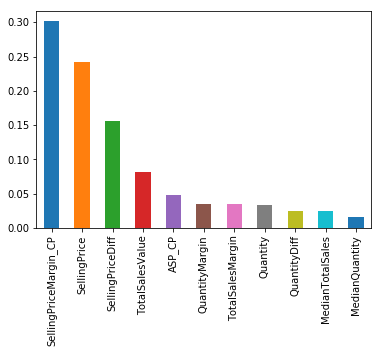

In [77]:
feat_importances_rf = pd.Series(clf_check.feature_importances_, index = X_train.columns)
feat_importances_ordered = feat_importances_rf.nlargest(n=len(feat_importances_rf))
feat_importances_ordered.plot(kind='bar')

### Considering only the top 4 features for our futher models

In [78]:
X_train1=X_train[["SellingPriceMargin_CP","SellingPrice","SellingPriceDiff","TotalSalesValue"]]
X_test1=X_test[["SellingPriceMargin_CP","SellingPrice","SellingPriceDiff","TotalSalesValue"]]

In [79]:
X_train1.shape

(29806, 4)

In [80]:
X_train1.describe()

,SellingPriceMargin_CP,SellingPrice,SellingPriceDiff,TotalSalesValue
count,29806.000000,29806.000000,29806.000000,2.980600e+04
mean,1.374702,16.353082,-0.410632,1.620022e+04
std,10.122271,65.868893,62.364994,5.736714e+04
min,0.003946,0.005320,-8670.411113,5.980000e+02
25%,0.863539,6.785857,-1.032198,1.340000e+03
50%,1.000000,10.756390,0.000000,2.975000e+03
75%,1.119464,16.504854,1.374703,1.066500e+04
max,839.862636,8755.900901,846.976639,2.170265e+06


#### NOTE : outliers were removed and tried but since the results didnt improve it was added back 

### Decision Tree and Random Forest with 4 important features

In [81]:
estimator_DT = DecisionTreeClassifier(max_depth=5,class_weight="balanced",random_state=123)
estimator_DT.fit(X_train1, y_train)

y1_pred_ = estimator_DT.predict(X_train1)
y_pred_ = estimator_DT.predict(X_test1)

print(accuracy_score(y_train,y1_pred_))
print(classification_report(y_train,y1_pred_,digits=4))
print("\n")

print(accuracy_score(y_test,y_pred_))
print(classification_report(y_test,y_pred_,digits=4))

0.6120244246124942
              precision    recall  f1-score   support

           1     0.1363    0.9040    0.2369       125
           2     0.1124    0.7367    0.1950      1789
           3     0.9746    0.6027    0.7448     27892

   micro avg     0.6120    0.6120    0.6120     29806
   macro avg     0.4078    0.7478    0.3922     29806
weighted avg     0.9193    0.6120    0.7097     29806



0.6131204008141538
              precision    recall  f1-score   support

           1     0.1296    0.8519    0.2249        54
           2     0.1110    0.7232    0.1925       766
           3     0.9734    0.6050    0.7462     11954

   micro avg     0.6131    0.6131    0.6131     12774
   macro avg     0.4047    0.7267    0.3879     12774
weighted avg     0.9181    0.6131    0.7108     12774



- for explanation of root and leaves in digramatic format

a=y_train.value_counts().reset_index()

dot_data = tree.export_graphviz(estimator_DT, out_file=None, 
                                feature_names=X_train1.columns,
                                class_names=a["index"], 
                                filled=True, rounded=True, special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

#### Random Forest

In [82]:
clf_RF = RandomForestClassifier(n_estimators=500,class_weight="balanced",max_depth=5,random_state=222,max_features=4
                             ,min_samples_leaf=50,min_samples_split=10)

clf_RF.fit(X=X_train1, y=y_train)
y_pred = clf_RF.predict(X_test1)
y1_pred_=clf_RF.predict(X_train1)

print(accuracy_score(y_train,y1_pred_))
print(classification_report(y_train,y1_pred_,digits=4))
print("\n")


print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred,digits=4))

0.6735892102261289
              precision    recall  f1-score   support

           1     0.1836    0.8960    0.3048       125
           2     0.1206    0.6646    0.2042      1789
           3     0.9710    0.6732    0.7951     27892

   micro avg     0.6736    0.6736    0.6736     29806
   macro avg     0.4251    0.7446    0.4347     29806
weighted avg     0.9166    0.6736    0.7576     29806



0.6798966651009863
              precision    recall  f1-score   support

           1     0.1800    0.8333    0.2961        54
           2     0.1250    0.6815    0.2113       766
           3     0.9724    0.6791    0.7997     11954

   micro avg     0.6799    0.6799    0.6799     12774
   macro avg     0.4258    0.7313    0.4357     12774
weighted avg     0.9183    0.6799    0.7623     12774



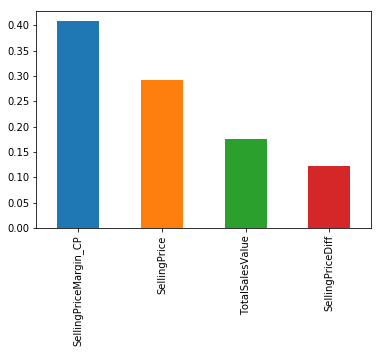

In [83]:
feat_importances_rf = pd.Series(clf_RF.feature_importances_, index = X_train1.columns)
feat_importances_ordered = feat_importances_rf.nlargest(n=len(feat_importances_rf))
feat_importances_ordered.plot(kind='bar')

### CODE showing on how to save model using pickle

In [84]:
from sklearn import model_selection
import pickle

## Neural NEt and autoencoders

- Standarizing data to pass to nerual net

In [85]:
num_atr=X_train1.select_dtypes(['int64','float64']).columns
print(num_atr)

scaler = StandardScaler() ## object intitation
scaler.fit(X_train1[num_atr])

X_train1[num_atr]=scaler.transform(X_train1[num_atr])
X_test1[num_atr]=scaler.transform(X_test1[num_atr])

Index(['SellingPriceMargin_CP', 'SellingPrice', 'SellingPriceDiff',
       'TotalSalesValue'],
      dtype='object')


In [86]:
X_train1.describe()

,SellingPriceMargin_CP,SellingPrice,SellingPriceDiff,TotalSalesValue
count,2.980600e+04,2.980600e+04,2.980600e+04,2.980600e+04
mean,-8.377505e-17,2.649006e-17,-2.896824e-17,2.178095e-18
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-1.354221e-01,-2.481905e-01,-1.390226e+02,-2.719759e-01
25%,-5.049977e-02,-1.452489e-01,-9.966757e-03,-2.590415e-01
50%,-3.701825e-02,-8.496857e-02,6.584449e-03,-2.305404e-01
75%,-2.521593e-02,2.304200e-03,2.862768e-02,-9.648923e-02
max,8.283734e+01,1.326832e+02,1.358777e+01,3.754939e+01


### loading packages for neural networks from keras

In [87]:
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical

Using TensorFlow backend.


In [88]:
X_train1.shape

(29806, 4)

## Building an autoencoder to generate new non linear features from existing ones 

In [89]:
# The size of encoded and actual representations
encoding_dim = 1
actual_dim = X_train1.shape[1]

## MINE
# Input placeholder
input_img = Input(shape=(actual_dim,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(actual_dim, activation='sigmoid')(encoded)

Instructions for updating:
Colocations handled automatically by placer.


In [90]:
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

print(autoencoder.summary())

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(X_train1, X_train1, epochs=30, batch_size=32)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 8         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
29806/29806 [==============================] - 2s 59us/step - loss: 0.5381
Epoch 2/30
29806/29806 [==============================] - 1s 47us/step - loss: 0.2262
Epoch 3/30
29806/29806 [==============================] - 1s 50us/step - loss: 0.1106
Epoch 4/30
29806/29806 [==============================] - 1s 49us/step - loss: 0.0615
Epoch 5/30
29

In [91]:
# MIne
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [92]:
print(encoder.summary())

#### derive new non-linear features

X_train_nonLinear_features = encoder.predict(X_train1)
X_test_nonLinear_features = encoder.predict(X_test1)

#### Combining new non-linear features to X_train and X_test respectively

X_train1_np=np.concatenate((X_train1, X_train_nonLinear_features), axis=1)
X_test1_np=np.concatenate((X_test1, X_test_nonLinear_features), axis=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
None


### building Decision tree and random Forest on concatenated old and new feature

In [93]:
estimator = DecisionTreeClassifier(max_depth=5,random_state=123,class_weight="balanced")
estimator.fit(X_train1_np, y_train)

y1_pred_ = estimator.predict(X_train1_np)
y_pred_ = estimator.predict(X_test1_np)

print(accuracy_score(y_train,y1_pred_))
print(classification_report(y_train,y1_pred_,digits=4))
print("\n")

print(accuracy_score(y_test,y_pred_))
print(classification_report(y_test,y_pred_,digits=4))

0.6120244246124942
              precision    recall  f1-score   support

           1     0.1363    0.9040    0.2369       125
           2     0.1124    0.7367    0.1950      1789
           3     0.9746    0.6027    0.7448     27892

   micro avg     0.6120    0.6120    0.6120     29806
   macro avg     0.4078    0.7478    0.3922     29806
weighted avg     0.9193    0.6120    0.7097     29806



0.6131204008141538
              precision    recall  f1-score   support

           1     0.1296    0.8519    0.2249        54
           2     0.1110    0.7232    0.1925       766
           3     0.9734    0.6050    0.7462     11954

   micro avg     0.6131    0.6131    0.6131     12774
   macro avg     0.4047    0.7267    0.3879     12774
weighted avg     0.9181    0.6131    0.7108     12774



##### Random Forest

In [94]:
clf = RandomForestClassifier(n_estimators=500,class_weight="balanced",random_state=123,max_depth=6,max_features=4,
                             min_samples_leaf=50,min_samples_split=10)

clf.fit(X=X_train1_np, y=y_train)
y_pred = clf.predict(X_test1_np)
y1_pred_=clf.predict(X_train1_np)

print(accuracy_score(y_train,y1_pred_))
print(classification_report(y_train,y1_pred_,digits=4))
print("\n")


print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred,digits=4))

0.6905321076293364
              precision    recall  f1-score   support

           1     0.1915    0.8960    0.3155       125
           2     0.1269    0.6652    0.2131      1789
           3     0.9717    0.6912    0.8078     27892

   micro avg     0.6905    0.6905    0.6905     29806
   macro avg     0.4300    0.7508    0.4455     29806
weighted avg     0.9177    0.6905    0.7701     29806



0.6979019884139659
              precision    recall  f1-score   support

           1     0.1803    0.8148    0.2953        54
           2     0.1310    0.6736    0.2194       766
           3     0.9724    0.6989    0.8133     11954

   micro avg     0.6979    0.6979    0.6979     12774
   macro avg     0.4279    0.7291    0.4427     12774
weighted avg     0.9186    0.6979    0.7755     12774



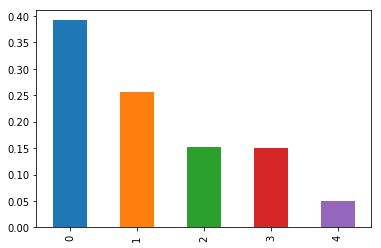

In [95]:
feat_importances_rf = pd.Series(clf.feature_importances_, index = pd.DataFrame(X_train1_np).columns)
feat_importances_ordered = feat_importances_rf.nlargest(n=len(feat_importances_rf))
feat_importances_ordered.plot(kind='bar')

#### From the above feature importance graph we can find that the new non linear feature is not contributing much and could even be adding some noise

## Learning curves for various models

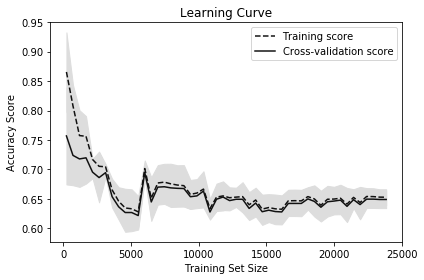

In [96]:
from sklearn.model_selection import learning_curve

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(DecisionTreeClassifier(max_depth=5,random_state=123,class_weight="balanced"), 
                                                        X_train1, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=5,
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

#### this model was not finalized as there is a lot of fluctuations on different cross validation folds and once number of sample size increases the model slowly becomes stable 

In [97]:
from sklearn.model_selection import learning_curve

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(n_estimators=50,class_weight="balanced",max_depth=5,
                             max_features=4,min_samples_leaf=50,min_samples_split=10), 
                                                        X_train1, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=5,
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(.01, 1.0, 20))

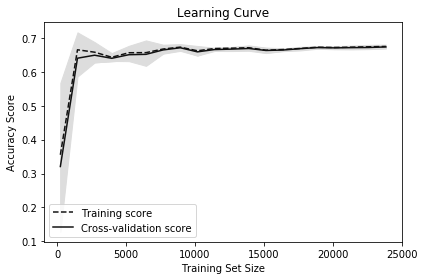

In [103]:
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

#### As you can see the training score and cross- validation score are very close to eachother even in small training set and continue to  be close to eachother as sample size increases - Therefore low bias and low variance model

#### XGboost not shown above but executed which yielded poor results 

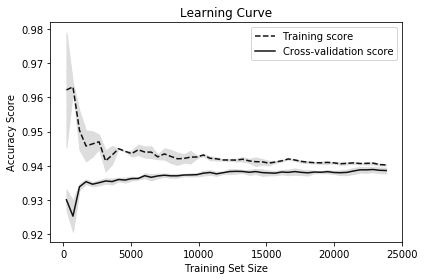

In [105]:
from sklearn.model_selection import learning_curve

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(XGBClassifier(n_estimators=30,class_weight="balanced",max_depth=4), 
                                                        X_train1, 
                                                        y_train,
                                                        cv=5,
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

#### This model is suffering from a high bias problem 

#### Random Forest with non linear features

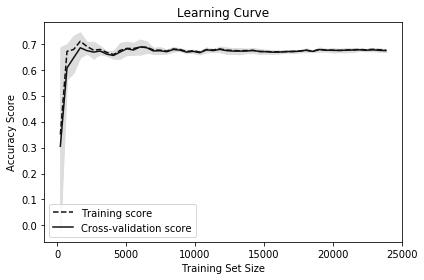

In [107]:
from sklearn.model_selection import learning_curve

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(n_estimators=50,class_weight="balanced",max_depth=5,
                             max_features=4,min_samples_leaf=50,min_samples_split=10), 
                                                        X_train1_np, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=5,
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

## CLUSTERING 

In [108]:
# Using the copy of the data which was created after all new features were added 
dataUnn.shape

(42580, 15)

In [109]:
dataUnn.head()

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious,SellingPrice,ASP_CP,MedianQuantity,MedianTotalSales,QuantityMargin,TotalSalesMargin,SellingPriceDiff,SellingPriceMargin_CP,QuantityDiff
0,Rep10101,C21116,PR6112,182,1665,3,9.148352,9.423077,182.0,1740.0,1.000000,0.956897,0.274725,0.970845,0.0
1,Rep10102,C21116,PR6112,182,1740,3,9.560440,9.423077,182.0,1740.0,1.000000,1.000000,-0.137363,1.014577,0.0
2,Rep10109,C21116,PR6112,182,1740,3,9.560440,9.423077,182.0,1740.0,1.000000,1.000000,-0.137363,1.014577,0.0
3,Rep10103,C21116,PR6253,101,1040,3,10.297030,14.658590,193.0,2807.5,0.523316,0.370436,4.361561,0.702457,92.0
4,Rep10104,C21116,PR6253,283,4495,2,15.883392,14.658590,193.0,2807.5,1.466321,1.601069,-1.224802,1.083555,-90.0


### Grouping the data SalesPerson wise do to segment SalesPerson 

In [110]:
d1=dataUnn.groupby("SalesPersonID").agg({"TotalSalesValue":np.median,"Quantity":np.median,"SellingPriceMargin_CP":np.mean,"ReportID":np.count_nonzero},axis=0)


In [111]:
d1.head()

,TotalSalesValue,Quantity,SellingPriceMargin_CP,ReportID
SalesPersonID,,,,
C21116,1740.0,166.0,0.959989,10
C21118,136240.0,70950.0,11.405030,10
C21119,1115.0,102.0,1.000000,4
C21121,5622.5,312.0,2.370057,32
C21122,1185.0,103.5,1.047227,28


In [112]:
d1.reset_index(inplace=True)
SalesPersonID=d1.SalesPersonID

In [113]:
d1.drop("SalesPersonID",axis=1,inplace=True)

In [114]:
d1.head()

,TotalSalesValue,Quantity,SellingPriceMargin_CP,ReportID
0,1740.0,166.0,0.959989,10
1,136240.0,70950.0,11.405030,10
2,1115.0,102.0,1.000000,4
3,5622.5,312.0,2.370057,32
4,1185.0,103.5,1.047227,28


In [115]:
d1.shape

(992, 4)

In [116]:
d2=d1.copy() ## creating a copy so that actual values can be used for analyzing after assigning labels 

In [117]:
d1.head()

,TotalSalesValue,Quantity,SellingPriceMargin_CP,ReportID
0,1740.0,166.0,0.959989,10
1,136240.0,70950.0,11.405030,10
2,1115.0,102.0,1.000000,4
3,5622.5,312.0,2.370057,32
4,1185.0,103.5,1.047227,28


##### Standarizing data for clustering 

In [118]:
num_atr=d1.select_dtypes(['int64','float64']).columns
print(num_atr)

scaler = StandardScaler() ## object intitation
scaler.fit(d1[num_atr])

d1[num_atr]=scaler.transform(d1[num_atr])
d1[num_atr]=scaler.transform(d1[num_atr])

Index(['TotalSalesValue', 'Quantity', 'SellingPriceMargin_CP', 'ReportID'], dtype='object')


### ELBOW curve to find the optimal cluster number which will define the particular dataset 

In [119]:
from sklearn.cluster import KMeans

[[-0.35857122 -0.17550655 -0.3961721  -0.56448472]
 [-0.35850918 -0.17519505  3.03682879 -0.56942075]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0

Text(0.5,1,'Elbow for KMeans clustering')

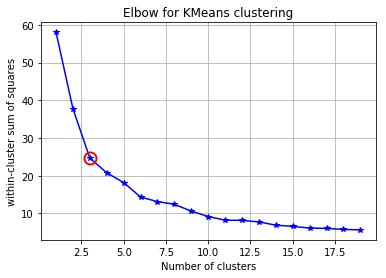

In [120]:

## Build K Means with the 2 clusters
kmeans = KMeans(n_clusters=2).fit(d1)

## Derive Centroids
centroids = kmeans.cluster_centers_

## Derive Labels
labels = kmeans.labels_

## Print Centroids
print(centroids)

## Print Labels
print(labels)

## Experiment/Build K means for different K values, from 1 to 20
K = range(1,20)
KM = [KMeans(n_clusters=k).fit(d1) for k in K]
centroids = [k.cluster_centers_ for k in KM]
#labelsk = [kmeans.labels_ for k in KM]

## Find with in sum of squared error
from scipy.spatial.distance import cdist, pdist

D_k = [cdist(d1, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
sumWithinSS = [sum(d) for d in dist]
#silhouetteSS=[silhouette_score(d,labels=labelsk) for d in dist]


## Elbow curve
#1 
# maring k=3
kIdx = 2
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, sumWithinSS, 'b*-')
ax.plot(K[kIdx], sumWithinSS[kIdx], marker='o', markersize=12, 
markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')


In [121]:
## Build K Means with the 3 clusters
kmeans = KMeans(n_clusters=3).fit(d1)

In [122]:
## Derive Centroids
centroids = kmeans.cluster_centers_

In [123]:
labels = kmeans.labels_

In [124]:
# adding labels to the actual values 
d2["label"]=labels

In [125]:
d2["label"] = d2["label"].astype('category')

In [126]:
# for 4 clusters 
# 0 - 976
# 1 - 12
# 3 - 3
# 2 - 1

In [127]:
d2.label.value_counts()

0    976
2     12
1      4
Name: label, dtype: int64

In [128]:
# for 2 clusters 
# 0 - 988
# 1 - 4

In [129]:
d2["SalesPersonID"]=SalesPersonID

In [130]:
d2[d2.label==1]

,TotalSalesValue,Quantity,SellingPriceMargin_CP,ReportID,label,SalesPersonID
349,4210.0,217.0,44.349369,11,1,C21553
354,7617.5,286.5,45.083315,18,1,C21558
435,264400.0,492249.5,87.343926,8,1,C21659
849,19215.0,26817.0,45.960275,21,1,C22168


In [131]:
## to show the SalesPersom with most supicious Yes is not a high risk SalesPerson
d2[d2.SalesPersonID=="C22030"]

,TotalSalesValue,Quantity,SellingPriceMargin_CP,ReportID,label,SalesPersonID
739,10520.0,1773.0,1.088686,525,0,C22030


In [132]:
dataUnn[(dataUnn.SalesPersonID=="C21659")&(dataUnn.Suspicious=='1')]

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious,SellingPrice,ASP_CP,MedianQuantity,MedianTotalSales,QuantityMargin,TotalSalesMargin,SellingPriceDiff,SellingPriceMargin_CP,QuantityDiff
40243,Rep50346,C21659,PR6518,1125,539145,1,479.24,0.691168,492249.5,264400.0,0.002285,2.039126,-478.548832,693.377053,491124.5


In [133]:
# C22030 - 497NO 19 Indeterminate 9Yes
# C21659 - 6 NO 1 Int 1 Yes

In [134]:
d2[d2.label==0].describe(include="all")

,TotalSalesValue,Quantity,SellingPriceMargin_CP,ReportID,label,SalesPersonID
count,976.000000,976.000000,976.000000,976.000000,976.0,976
unique,NaN,NaN,NaN,NaN,1.0,976
top,NaN,NaN,NaN,NaN,0.0,C22266
freq,NaN,NaN,NaN,NaN,976.0,1
mean,10864.276127,2914.058914,1.143966,43.319672,NaN,NaN
std,30561.452720,12760.344991,0.557911,76.612661,NaN,NaN
min,1005.000000,85.000000,0.690233,1.000000,NaN,NaN
25%,1607.500000,118.500000,0.984118,10.000000,NaN,NaN
50%,3435.000000,228.500000,1.004324,22.000000,NaN,NaN
75%,8613.750000,1035.750000,1.090198,45.000000,NaN,NaN


In [135]:
d2[d2.label==1].describe(include="all")

,TotalSalesValue,Quantity,SellingPriceMargin_CP,ReportID,label,SalesPersonID
count,4.000000,4.000000,4.000000,4.000000,4.0,4
unique,NaN,NaN,NaN,NaN,1.0,4
top,NaN,NaN,NaN,NaN,1.0,C21558
freq,NaN,NaN,NaN,NaN,4.0,1
mean,73860.625000,129892.500000,55.684221,14.500000,NaN,NaN
std,127188.520092,241895.710783,21.116740,6.027714,NaN,NaN
min,4210.000000,217.000000,44.349369,8.000000,NaN,NaN
25%,6765.625000,269.125000,44.899829,10.250000,NaN,NaN
50%,13416.250000,13551.750000,45.521795,14.500000,NaN,NaN
75%,80511.250000,143175.125000,56.306188,18.750000,NaN,NaN


In [136]:
d2[d2.label==2].describe(include="all")

,TotalSalesValue,Quantity,SellingPriceMargin_CP,ReportID,label,SalesPersonID
count,12.000000,12.000000,12.000000,12.000000,12.0,12
unique,NaN,NaN,NaN,NaN,1.0,12
top,NaN,NaN,NaN,NaN,2.0,C21118
freq,NaN,NaN,NaN,NaN,12.0,1
mean,34140.416667,12480.625000,14.189453,20.166667,NaN,NaN
std,44108.901504,20223.205256,4.988150,16.353111,NaN,NaN
min,1675.000000,148.000000,8.329741,5.000000,NaN,NaN
25%,3533.750000,490.375000,11.140478,8.500000,NaN,NaN
50%,12666.250000,5850.750000,12.329318,15.000000,NaN,NaN
75%,43638.125000,12703.500000,16.295548,23.500000,NaN,NaN


#### if we observe here the difference in clusters are their SellingPriceMargin will he is low , medium and very high respectively 
- We could conclude that the ones with High SellingPriceMargin to be High Risk Salesperson 

## Functions to use pipeline in Pandas

In [137]:
def feature_eng(dataframe):
    dataframe['SellingPrice']=dataframe.TotalSalesValue/dataframe.Quantity
    d_10=dataframe.groupby(["SalesPersonID","ProductID"]).agg({"Quantity":np.sum,"TotalSalesValue":np.sum},axis=0)
    d_10['ASP_CP']=d_10.TotalSalesValue/d_10.Quantity
    dcheck=d_10.reset_index()
    dataframe=pd.merge(dataframe,dcheck[['SalesPersonID','ProductID','ASP_CP']],
              left_on=['SalesPersonID','ProductID'],
              right_on=['SalesPersonID','ProductID'],how='inner')
    d_11=dataframe.groupby(["SalesPersonID","ProductID"]).agg({"Quantity":np.median,"TotalSalesValue":np.median},axis=0)
    d_11=d_11.reset_index()
    d_11=d_11.rename(index=str,columns={"Quantity":"MedianQuantity",'TotalSalesValue':"MedianTotalSales"})
    # join operation performed on main data
    dataframe=pd.merge(dataframe,d_11[['SalesPersonID','ProductID','MedianQuantity','MedianTotalSales']],
              left_on=['SalesPersonID','ProductID'],
              right_on=['SalesPersonID','ProductID'],how='inner')
    return dataframe

In [138]:
def Ratios(data4):
    data4['QuantityMargin']=data4.Quantity/data4.MedianQuantity
    data4['TotalSalesMargin']=data4.TotalSalesValue/data4.MedianTotalSales
    data4['SellingPriceDiff']=data4.ASP_CP-data4.SellingPrice
    data4['SellingPriceMargin_CP']=data4.SellingPrice/data4.ASP_CP
    data4['QuantityDiff']=data4.MedianQuantity-data4.Quantity
    return data4

In [139]:
def selection(dataset):
    ReportID=dataset.ReportID
    dataset.drop(["ProductID","SalesPersonID","ReportID"],axis=1,inplace=True)
    dataset1=dataset[["SellingPriceMargin_CP","SellingPrice","SellingPriceDiff","TotalSalesValue"]]
    return dataset1,ReportID

## Prediction for test Data SCT 

In [140]:
tdata=pd.read_excel("PHD_TestData/Test.xlsx")

In [141]:
tdata.head()

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue
0,Rep70101,C21844,PR6483,102,1115
1,Rep70102,C21844,PR6251,102,1050
2,Rep70103,C21844,PR6253,344,3490
3,Rep70104,C21844,PR6378,108,1095
4,Rep70105,C21844,PR6463,146,1055


In [142]:
tdata.shape

(9135, 5)

In [143]:
# defining a pipeline of functions 
tfinal,ReportID=(tdata.pipe(func=feature_eng).pipe(func=Ratios).pipe(func=selection))

In [144]:
tfinal.head()

,SellingPriceMargin_CP,SellingPrice,SellingPriceDiff,TotalSalesValue
0,1.0,10.931373,0.0,1115
1,1.0,10.931373,0.0,1115
2,1.0,10.931373,0.0,1115
3,1.0,10.931373,0.0,1115
4,1.0,10.294118,0.0,1050


- Predicting from best model on the test data

In [145]:
test_pred = clf_RF.predict(tfinal)

In [146]:
dataT1={'ReportID':ReportID,'Suspicious':test_pred}
d1f=pd.DataFrame(dataT1)

In [147]:
d1f.Suspicious.value_counts()

3    5529
2    3486
1     120
Name: Suspicious, dtype: int64

In [148]:
#d1f.to_csv("Submission_RF_NN_1Auto.csv",index=False)

## loading model using pickle and predicting 

## Adding non Linear features for test Data

In [150]:
tfinal.describe()

,SellingPriceMargin_CP,SellingPrice,SellingPriceDiff,TotalSalesValue
count,9135.000000,9135.000000,9135.000000,9.135000e+03
mean,1.610482,14.322076,-0.162717,1.154211e+04
std,8.919273,23.025443,20.268518,3.671294e+04
min,0.060848,0.006659,-1035.817189,9.350000e+02
25%,0.900752,7.903282,-0.968012,1.205000e+03
50%,1.000000,10.643087,0.000000,2.235000e+03
75%,1.102152,14.750187,0.943065,7.817500e+03
max,231.406671,1190.875706,145.623489,1.298690e+06


In [151]:
t_final=tfinal.copy()

In [152]:
num_atr=t_final.select_dtypes(['int64','float64']).columns
print(num_atr)

#scaler = StandardScaler() ## object intitation
#scaler.fit(t_final[num_atr])

t_final[num_atr]=scaler.transform(t_final[num_atr])

Index(['SellingPriceMargin_CP', 'SellingPrice', 'SellingPriceDiff',
       'TotalSalesValue'],
      dtype='object')


In [153]:
print(encoder.summary())

#### derive new non-linear features

t_final_nonLinear_features = encoder.predict(t_final)

#### Combining new non-linear features to Test

t_final_np=np.concatenate((t_final, t_final_nonLinear_features), axis=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
None


## FINAL MODEL
#### The model using non linear features yielded same 90% in SCT and therefore OCCAM razor , a simpler model is chosen as no improvement in results 
### RandomForest without non linear features

# Conclusion 
- Succesfully built a ML model to predict Supicious Reports with a recall of 83% on Yes and an accuracy of 70% on all classes
- The model achieved a recall of 90% in SCT for unseen data
- Segemented salesperson into 3 clusters using k means clustering algorithm 
- The business could collect more attributes to improve the performance of the model 
- The business could impose a maximum Quantity and minimum price at which to be sold for a product , a bare minimum would atleast throw out highly faults reports 
